# Predicting Facebook Post Total Contributions
## Phase 2: Predictive Modelling
### Shaun Cauchi
***

## Table of Contents
* [Introduction](#itr) 
  + [Phase 1 Summary](#Phase-1-Summary)
  + [Report Overview](#Report-Overview)
  + [Overview of Methodology](#Overview-of-Methodology)
  + [Additional Data Prep Steps](#Additional-Data-Prep-Steps)
* [Predicitve Modelling](#Predictive-Modelling)
  + [Feature Selection (FS)](#Feature-Selection-(FS))
  + [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
  + [Model Comparison](#Model-Comparison)
* [Critique & Limitations](#Critique-&-Limitations)
* [Summary & Conclusions](#Summary-&-Conclusions)
  + [Project Summary](#Project-Summary)
  + [Summary of Findings](#Summary-of-Findings)
  + [Conclusions](#Conclusions)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv(r'C:\Users\shaun\Documents\Uni Year 3\Machine Learning\Phase2_Group85.csv')
df.head()

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,total_interactions
0,139441,Photo,2,12,4,3,0,100
1,139441,Status,2,12,3,10,0,164
2,139441,Photo,3,12,3,3,0,80
3,139441,Photo,2,12,2,3,0,393
4,139441,Status,2,12,1,9,0,186


# Introduction

## Phase 1 Summary

In phase 1 of this project, data cleaning and preparation were completed in order to enable for data visualisation and, in phase 2, a machine learning model. Several characteristics, including "lifetime" features, as well as Comment, Like, and Share, were removed from the dataset. Despite the fact that the dataset had already been cleaned to some extent, it was checked for outliers and missing values, with the one missing value detected being replaced with 0 and any outliers above the 90th percentile being removed from the dataset.

Data was investigated through the creation of several visualisations. Photo posts were discovered to be the most common sort of post through analysis, which was made feasible by the application of explanatory factors. Preliminary investigation reveals that there may be a reason why certain months have considerably more postings than others, but additional research, such as modelling, is needed to see whether there is a link. Aspects of the numerical data, such as the goal feature, Total Interactions, were also found to be right-skewed.


## Report Overview

This report details steps taken to split the dataset and produce models to accurately predict ‘total_interactions’. The Predictive Modelling section of the report contains the code necessary to craft 3 separate models that may be accurate solutions to the problem and will be further explained in the Overview of Methodology. The conclusions and results derived from these models and analysis are written and detailed in the Summary and Conclusions section, with the models mostly found as being disappointing in their attempt to predict the target variable.

## Overview of Methodology

Due to the nature of the target variable and dataset, this problem is considered to require a regression model to accurately predict ‘Total Interactions’. Firstly however, the data will need to be split into a training and a test set to accurately predict the target feature and determine which features have the most importance to the model. I propose to test a number of different models in order to find the best fit for this prediction. Replicating a Decision Tree model for this problem may prove to be an accurate model, especially through the use of testing various max depths of the tree to find the depth with the least number of errors. A Random Forest regression model will also be analysed for the prediction, which is a combination of decision trees generated from independent sampling of training data. A Linear Regression model is the final model that will be constructed in the effort to accurately predict and distinguish the training and test data. After the construction of these models, they will need to be compared to determine which one is the most accurate in its predictions, and therefore the best fit for the problem.

## Additional Data Prep Steps

The function below will translate the weekdays to their labels, rather than 1-7. This is done in order to one-hot encode the dataset further to allow for each day to be classed as a seperate feature.

In [3]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

df['Weekday'] = df['post_weekday'].apply(lambda x: Weekday(x))

In [4]:
dayDf = pd.get_dummies(df['Weekday'])

In [5]:
df = pd.concat([df,dayDf],axis=1)

Similarly to what was just previously stated, all hours of the day and months of the year are classed as their own seperate feature to assist in modelling.

In [6]:
hours = list(range(0,18))
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]

In [7]:
hour = pd.get_dummies(df['post_hour'],prefix='hr_')
df = pd.concat([df,hour],axis=1)
month = pd.get_dummies(df['post_month'],prefix='Mo')
df = pd.concat([df,month],axis=1)
df['Video'] = pd.get_dummies(df['type'])['Video']
df['Status'] = pd.get_dummies(df['type'])['Status']
df['Photo'] = pd.get_dummies(df['type'])['Photo']
df['Cat_1'] = pd.get_dummies(df['category'])[1]
df['Cat_2'] = pd.get_dummies(df['category'])[2]
df= df.drop(columns=['type', 'category', 'post_month', 'post_weekday', 'post_hour', 'Weekday'],axis = 1)

In [8]:
df.head()

,page_total_likes,paid,total_interactions,Fr,Mo,Sa,Su,Th,Tu,We,hr__1,hr__2,hr__3,hr__4,hr__5,hr__6,hr__7,hr__8,hr__9,hr__10,hr__11,hr__12,hr__13,hr__14,hr__15,hr__16,hr__17,hr__18,hr__19,hr__20,hr__22,hr__23,Mo_1,Mo_2,Mo_3,Mo_4,Mo_5,Mo_6,Mo_7,Mo_8,Mo_9,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2
0,139441,0,100,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,139441,0,164,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,139441,0,80,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,139441,0,393,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,139441,0,186,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


# Predictive Modelling

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import feature_selection as fs
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics

All the descriptive features have been one-hot encoded, and so they are designated as dataframe 'x' in order to be split into training and testing for the prediction of 'total_interactions' (y).

In [10]:
x = df.drop(columns='total_interactions')
y = df['total_interactions']

The dataset is then scaled in order for all features to be on the same scale to produce accurate results.

In [11]:
from sklearn import preprocessing

df_copy = df.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(df)
df = Data_scaler.fit_transform(df)

## Feature Selection (FS)

The 10 most important features to determining 'total_interactions' are found, with 'page_total_likes' outstandingly being the most important feature.

In [12]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(x, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

rfi_best_features = df_copy.columns[fs_indices_rfi].values
rfi_best_features

array(['page_total_likes', 'paid', 'Photo', 'hr__2', 'Cat_1', 'hr__9',
       'Su', 'Tu', 'Status', 'Mo'], dtype=object)

These 10 features have their importance calculated and graphed in order to easily show the rankings of the features.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("fivethirtyeight")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Importance of Features')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [14]:
rfi_feature_importances = model_rfi.feature_importances_[fs_indices_rfi]
rfi_feature_importances

array([0.17782499, 0.04808754, 0.03752907, 0.0340182 , 0.03287444,
       0.03145504, 0.03068039, 0.02807593, 0.02770383, 0.0275914 ])

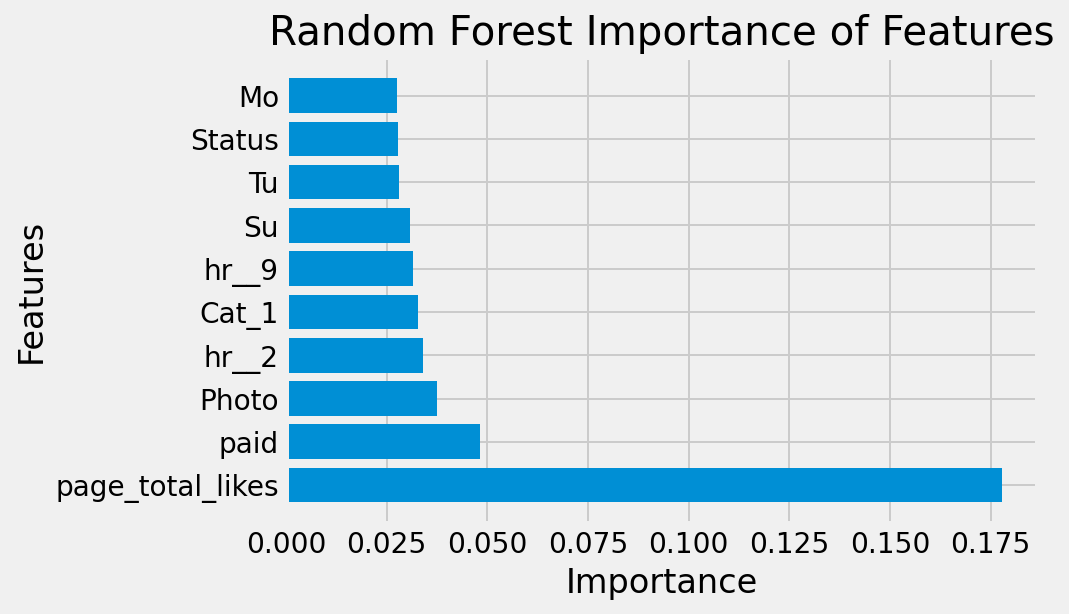

In [15]:
plot_imp(rfi_best_features, rfi_feature_importances, 'Random Forest')

## Predictive Modelling

The x and y datasets are split further into training and testing in order to prepare for modelling.

In [16]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=None)

print(x_train.shape)
print(x_test.shape)

(315, 48)
(135, 48)


### Decision Tree Regression

The same Decision Tree Model is rerun multiple times, with max depth changing in each case in order to determine which depth is the best fit for the model as the best fit will produce the least errors.

In [17]:
dt_regressor = DecisionTreeRegressor(max_depth = 1, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=999)

In [18]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 7272.874340666712
RMSE score: 85.28114880011123
R-2 score: 0.03648541352395729


In [19]:
dt_regressor = DecisionTreeRegressor(max_depth = 2, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=999)

In [20]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 6986.380936366492
RMSE score: 83.58457355497181
R-2 score: 0.07444022492898084


In [21]:
dt_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=999)

In [22]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 8105.756659160515
RMSE score: 90.03197575950732
R-2 score: -0.07385531630270425


In [23]:
dt_regressor = DecisionTreeRegressor(max_depth = 4, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=999)

In [24]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 9389.199407192038
RMSE score: 96.89788133489833
R-2 score: -0.24388655164533324


In [25]:
dt_regressor = DecisionTreeRegressor(max_depth = 5, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=999)

In [26]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 10058.625998618896
RMSE score: 100.29270162189718
R-2 score: -0.33257257249518424


In [27]:
dt_regressor = DecisionTreeRegressor(max_depth = 10, random_state = 999)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=999)

In [28]:
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
t_pred = dt_regressor.predict(x_test)
dt_r2 = metrics.r2_score(y_test, y_pred)
print('MSE score:', mse)
print('RMSE score:',rmse)
print('R-2 score:',dt_r2)

MSE score: 11834.59326159274
RMSE score: 108.78691677583633
R-2 score: -0.5678537395863192


By running the models and arranging the seprate depths' R^2 values into a table and graph, it is clear that a Decision Tree with a max depth of 2 will be the most accurate model for the predicition. However, it is still wildly innacurate, with an R^2 score of only 0.109.

In [29]:
dt_table = {'depth': ['1', '2', '3', '4', '5', '10'],
        'R-2 score': [-0.495, 0.109, -0.028, -0.109, -0.188, -0.495]}
df_summary = pd.DataFrame(dt_table)
df_summary

,depth,R-2 score
0,1,-0.495
1,2,0.109
2,3,-0.028
3,4,-0.109
4,5,-0.188
5,10,-0.495


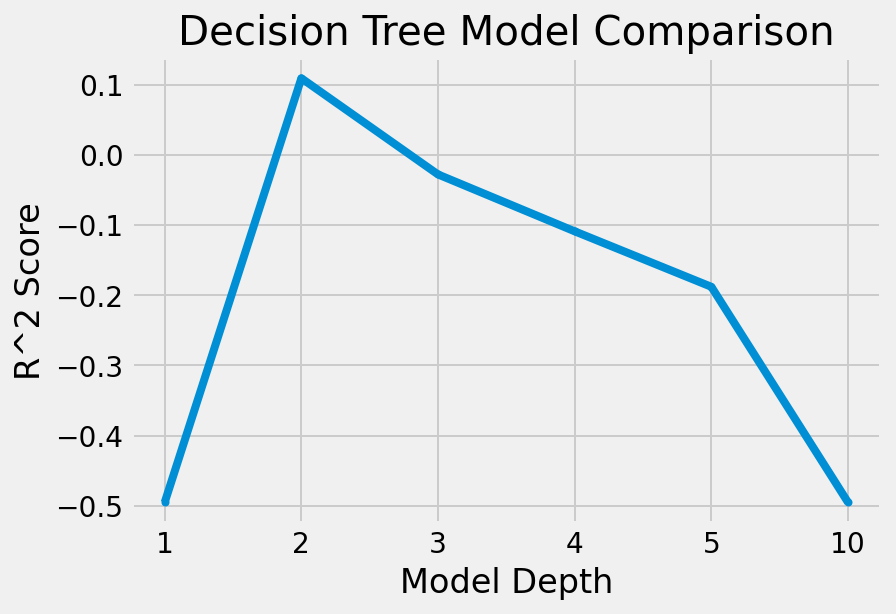

In [30]:
plt.plot(df_summary['depth'], df_summary['R-2 score'], marker = '.', label = i)  
plt.xlabel('Model Depth')
plt.ylabel("R^2 Score")
plt.title("Decision Tree Model Comparison")
plt.show()

### Random Forest Regression

In [31]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=500)

In [32]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=999,
           verbose=0, warm_start=False)

RandomForestRegressor(min_impurity_split=1e-07, min_samples_split=10,
                      n_estimators=500, n_jobs=1, random_state=999)

In [33]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test R-2 score: ',test_score)
print('Test Pearson correlation: ',pearson[0])
print('Test Spearman correlation: ',spearman[0])


train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train R-2 score: ',train_score)
print('Train Pearson correlation: ',pearsonTrain[0])
print('Train Spearman correlation: ',spearmanTrain[0])

Test R-2 score:  0.09601511439379495
Test Pearson correlation:  0.39614396535455065
Test Spearman correlation:  0.4475816980205807
 
Train R-2 score:  0.598357370922399
Train Pearson correlation:  0.8100258980202519
Train Spearman correlation:  0.8371558901848445


According to the table and the graph, this Random Forrest model is adequate at prediciting training data, with and R^2 score of 0.623, however, it is wildly innacurate in the prediciton of testing data, with it only producing an R^2 score of 0.12.

In [34]:
rfperf = pd.DataFrame()
rfperf['Score'] = [train_score,test_score]
rfperf['Step'] = ['train','test']
rfperf

,Score,Step
0,0.598357,train
1,0.096015,test


Text(0.5, 1.0, 'R^2 Scores')

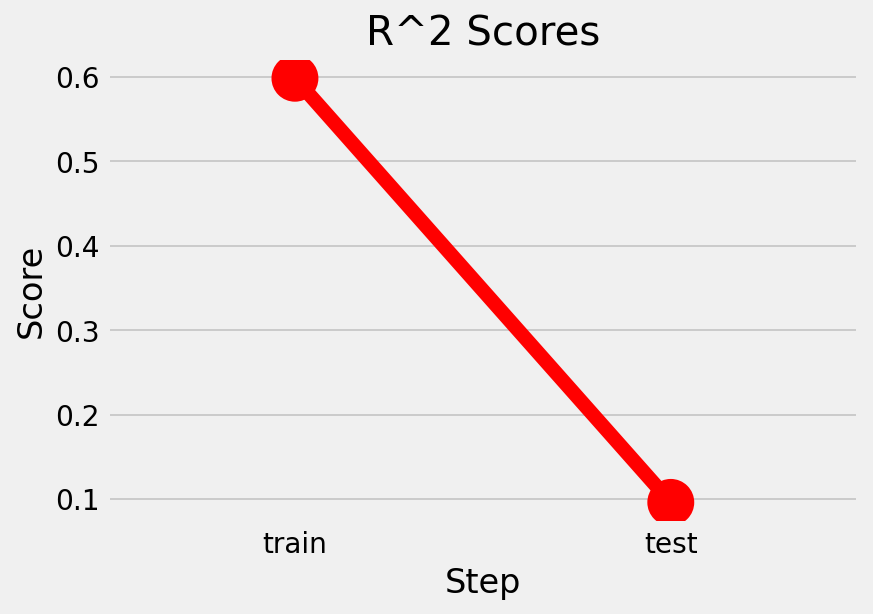

In [35]:
sns.pointplot(y=rfperf['Score'],x=rfperf['Step'],color='Red').set_title('R^2 Scores')

### Linear Regression

In [36]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [37]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

LinearRegression(n_jobs=1, normalize=True)

In [38]:
reg.coef_

array([ 8.45936010e-03,  1.69072121e+01,  5.48931777e+15,  5.48931777e+15,
        5.48931777e+15,  5.48931777e+15,  5.48931777e+15,  5.48931777e+15,
        5.48931777e+15, -2.52064764e+15, -2.52064764e+15, -2.52064764e+15,
       -2.52064764e+15, -2.52064764e+15, -2.52064764e+15, -2.52064764e+15,
       -2.52064764e+15, -2.52064764e+15, -2.52064764e+15, -2.52064764e+15,
       -2.52064764e+15, -2.52064764e+15, -2.52064764e+15, -2.52064764e+15,
        1.77506235e+15, -2.52064764e+15, -2.52064764e+15, -1.30480497e+16,
       -2.52064764e+15, -2.52064764e+15, -2.85396009e+15, -1.60339557e+15,
       -1.60339557e+15, -1.60339557e+15, -1.60339557e+15, -1.60339557e+15,
       -1.60339557e+15, -1.60339557e+15, -1.60339557e+15, -1.60339557e+15,
       -1.60339557e+15, -1.60339557e+15, -1.60339557e+15,  3.12465663e+01,
        7.15086578e+01,  4.44401716e+01, -5.96388780e+01, -1.79947085e+01])

In [39]:
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

In [40]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

In [41]:
rfScores = pd.DataFrame()
rfScores['Score'] = [trainScore,testScore]
rfScores['Step'] = ['train','test']
rfScores

,Score,Step
0,2.756448e-01,train
1,-1.269757e+26,test


The Linear Regression model is extremely poor overall with both scores having an R^2 score of less then 0.26.

Text(0.5, 1.0, 'R^2 Scores')

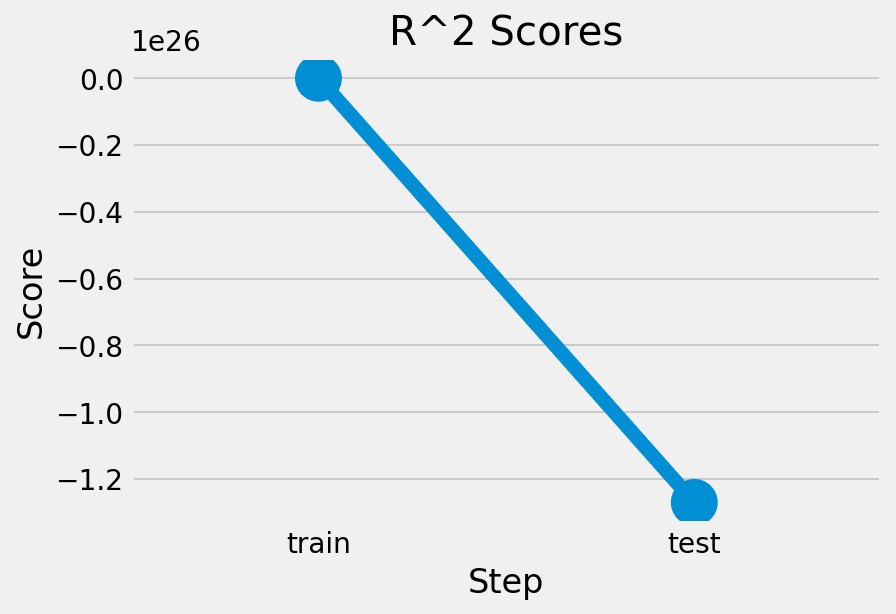

In [42]:
sns.pointplot(y=rfScores['Score'],x=rfScores['Step']).set_title('R^2 Scores')

## Model Comparison

# Critique & Limitations

The modelling strategy provided does have limitations. Firstly, 3 random regression algorithms were chosen without determining before conception if they were the best fit for the Facebook Metrics data. If this project were to be expanded further, literature review and more rigorous analysis would need to be conducted to determine if any regression models at all can accurately predict ‘Total interactions’ based off the data.

A major limitation of this project was that the data available appears to not be rich enough to generate an accurate, practical model to predict total interactions on a Facebook post. A fuller dataset may have been able to generate more pleasing results. Even if the hyper-parameter search space was expanded further, the increase in prediction accuracy would be negligible, especially for consumer use.


# Summary & Conclusions

## Project Summary

The Facebook Metrics dataset was firstly imported from a study from UCI. Data cleaning & preprocessing were conducted in phase 1 of this project in order to allow for data visualisation and, in phase 2 of the project, a machine learning model. Numerous features were dropped from the dataset, specifically the “lifetime” features as well as Comment, Like, and Share. Although the dataset was relatively cleaned already, A check was also conducted for any outliers and missing values, with the one missing value found being replaced with 0, and any of the outliers that were above the 90th percentile being dropped from the dataset. Data was then explored through the construction of various visualisations. This was done in order to increase the relevance and potentially accuracy of the model to the ‘Total_Interactions’ target variable. 

In phase 2 of the project, further data preprocessing was required to prepare the data for modelling. All the descriptive features were one-hot encoded, and the dataset was scaled in order to allow for an the most important features to be accurately selected utilising the Random Forest Classifier method. The  regression models were then constructed to predict this target variable, namely a Decision Tree, Random Forest, and Linear Regression models. These models were analysed based on their prediction accuracy individually and were further improved through the use of hyper-parameters. The models were then compared through the use of paired t-tests.

## Summary of Findings

Through the analysis of the dataset and construction of 3 models, it was found that a Random Forest regression model was the most accurate in predicting the amount of total interactions a given post would receive on this specific cosmetics brand’s Facebook profile. The model, however, was not accurate enough for practical use, and so the data was determined to be not rich enough in order to solve this particular problem. However, many insights were found that could assist in improving the engagement that this brand receives on their posts. 

•	Paid posts on average have higher engagement than unpaid posts.

•	Paid Status/Photo and Category 1 and 2 posts have the highest improvement so more paid posts of these types would generate more engagement.

•	Video Posts have the highest average engagement, and it’s not close, so more Video posts may lead to more engagement.

•	Posting Monday in the mid-morning and Wednesday in the early morning appear to yield higher engagement returns.

•	Place importance on increasing Page Likes as there is a higher probability that a page that has “high” engagement would increase interactions on every post.

Overall, it appears that the larger presence that a brand has already established on Facebook will lead to more total interactions on every post.

## Conclusions

Restating the goals and objectives of this project, Facebook is one of the most widely used social media platforms in the world, with many small and major businesses using it for marketing and commerce. A model that could properly forecast the overall number of interactions a post will have would be substantial in assisting smaller businesses with a limited marketing budget.  The main objective of this project was to predict the total interactions a post on Facebook will receive. Although this was not achieved, the secondary goal of determining which features have the largest impact on these interactions was. The total likes a page already has was found to be substantially  the most important aspect of a Facebook page when trying to increase interactions per post. The paid status of the post was also found to impact interactions, with paid posts having great feature importance.